In [1]:
#Model development for Trawling4PACE
#Authors: HS, VA, FB, PP
#History: 1/29/26
#Goals: Run Random forest and boosted regression tree models for predicting silver hake abundance

In [131]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import datetime

In [5]:
os.chdir('/home/jovyan/2026-proj-Trawling4PACE/data')

In [134]:
df= pd.read_csv('/home/jovyan/2026-proj-Trawling4PACE/contributor_folders/leandro/correlation_data.csv')

In [140]:
pd.to_datetime(df.BEGIN_GMT_TOWDATE).dt.month

0        3
1        3
2        3
3        3
4        3
        ..
14491    9
14492    9
14493    9
14494    9
14495    9
Name: BEGIN_GMT_TOWDATE, Length: 14496, dtype: int32

In [141]:
#Data cleaning 
#all values in glorys_thetao_bottom are NAN so we need to clean them out 
df['month']=pd.to_datetime(df.BEGIN_GMT_TOWDATE).dt.month
df['day']=pd.to_datetime(df.BEGIN_GMT_TOWDATE).dt.day
df['year']=pd.to_datetime(df.BEGIN_GMT_TOWDATE).dt.year
df['doy']= [datetime.date(df.year[x],df.month[x],df.day[x]).timetuple().tm_yday for x in df.index]

df = df.drop(['glorys_thetao_bottom','BEGIN_GMT_TOWDATE'],axis=1).dropna()

#PLACEHOLDER for standardizing variables / outlier removal 
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [152]:
#SPLIT DATA INTO TRAINING/TESTING 
y = df['EXPCATCHNUM_log']
X = df[['DECDEG_ENDLAT', 'DECDEG_ENDLON', 'curl_stress_curl', 'fsle_fsle_max','glorys_mlotst_surface',
       'glorys_thetao_surface','BOTTEMP', 'BOTSALIN', 'SURFSALIN', 'SURFTEMP','month','year','day']]

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
X.corr()

,DECDEG_ENDLAT,DECDEG_ENDLON,BOTTEMP,BOTSALIN,SURFSALIN,SURFTEMP,curl_stress_curl,fsle_fsle_max,glorys_bottomT_surface,glorys_mlotst_surface,glorys_so_surface,glorys_thetao_surface
DECDEG_ENDLAT,1.000000,0.851298,-0.638629,-0.192554,-0.504464,-0.575236,-0.216248,0.072437,-0.570713,-0.372298,-0.544662,-0.590408
DECDEG_ENDLON,0.851298,1.000000,-0.510682,-0.048413,-0.196453,-0.461527,-0.269485,-0.036873,-0.482157,-0.270102,-0.320078,-0.489425
BOTTEMP,-0.638629,-0.510682,1.000000,0.758644,0.583846,0.619598,0.032839,-0.271062,0.826386,0.365344,0.643520,0.640224
BOTSALIN,-0.192554,-0.048413,0.758644,1.000000,0.535647,0.336763,-0.171123,-0.233031,0.619304,0.174734,0.536180,0.332101
SURFSALIN,-0.504464,-0.196453,0.583846,0.535647,1.000000,0.616037,-0.129269,-0.132110,0.493932,0.454563,0.769844,0.547024
SURFTEMP,-0.575236,-0.461527,0.619598,0.336763,0.616037,1.000000,0.084285,-0.322381,0.571432,0.382146,0.638127,0.919518
curl_stress_curl,-0.216248,-0.269485,0.032839,-0.171123,-0.129269,0.084285,1.000000,0.044909,0.010421,-0.075065,0.010284,0.098038
fsle_fsle_max,0.072437,-0.036873,-0.271062,-0.233031,-0.132110,-0.322381,0.044909,1.000000,-0.250943,-0.135875,-0.216416,-0.284372
glorys_bottomT_surface,-0.570713,-0.482157,0.826386,0.619304,0.493932,0.571432,0.010421,-0.250943,1.000000,0.286996,0.527060,0.609772
glorys_mlotst_surface,-0.372298,-0.270102,0.365344,0.174734,0.454563,0.382146,-0.075065,-0.135875,0.286996,1.000000,0.499067,0.410545


In [ ]:
#hyperparameterization
param_grid={'n_estimators':[100,200,300],
            'max_features':['sqrt','log2',0.8],
           'max_depth':[10,20,30,None]}
from sklearn.model_selection import GridSearchCV
model=RandomForestRegressor()
grid_search = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=5,
                          scoring='neg_mean_squared_error',
                          n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print(grid_search.best_params_)

# Print the best score achieved (neg_mean_squared_error, so lower is better for actual MSE)
print(grid_search.best_score_)

In [ ]:
#n_estimators == # of decision trees 
#oob_score == out of bag estimate of models general error
#random_state is for reproducibility

#optimize the number of trees?
#hyperparameterization
regressor = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'], max_features= grid_search.best_params_['max_features'],max_depth = grid_search.best_params_['max_depth'],random_state=0, oob_score=True)

regressor.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

In [ ]:
importances = regressor.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X_train.columns, 'Gini Importance': importances}).sort_values(
    'Gini Importance', ascending=False)
print(feature_imp_df)

/tmp/ipykernel_249/2496803616.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


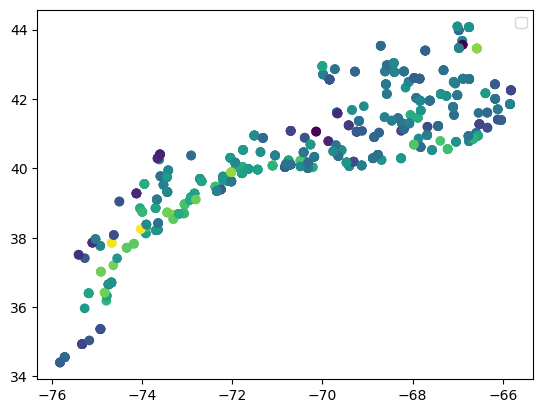

In [133]:
plt.scatter(X_test.DECDEG_ENDLON, X_test.DECDEG_ENDLAT, c=predictions) 
plt.legend()